Dataset Head:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0  -0.042375  -0.613909  -1.520870   0.425742   1.448784  -1.186647   
1  -0.301464   1.561446   2.085848   0.352879  -2.784729   0.604897   
2  -1.429839  -4.574818   0.865326   3.406769   0.109679   0.110667   
3   1.153582  -0.703640   0.638677  -0.811433   0.142796   1.047376   
4   5.553882  -1.794461   4.615764  -4.834441  -0.056307  -1.252433   

   Feature_7  Feature_8  Feature_9  Feature_10  Target  
0   1.211138   1.638995   1.130259   -1.042248       0  
1  -3.027484   0.261919  -1.614547    0.486968       0  
2   0.440615   2.628613   0.896503    0.069644       1  
3   1.277690  -1.637484   0.898148    2.534501       1  
4   4.419258  -0.277311  -0.212956   -2.611014       0  

Dataset Shape: (3400, 11)

Accuracy: 0.7392

Confusion Matrix:
[[372 143]
 [123 382]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       5

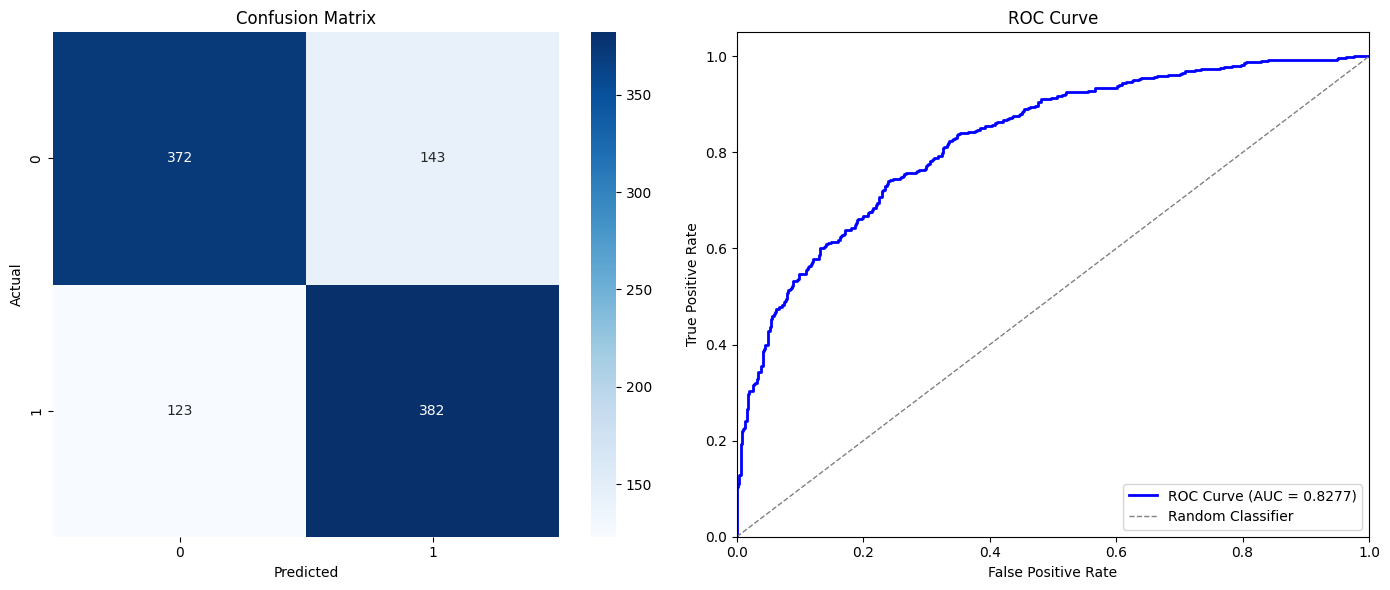

AUC Score: 0.8277


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    roc_curve,
    auc,
    accuracy_score,
    classification_report
)

# Set random seed for reproducibility
np.random.seed(42)

# Generate a dataset: 3400 samples, 10 features, 1 target
X, y = make_classification(
    n_samples=3400,
    n_features=10,
    n_informative=8,
    n_redundant=2,
    n_classes=2,
    random_state=42
)

# Convert to DataFrame (optional, for better visualization)
feature_names = [f'Feature_{i+1}' for i in range(10)]
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

# Display first few rows
print("Dataset Head:")
print(df.head())

# Check shape
print(f"\nDataset Shape: {df.shape}")

# Split into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# ROC Curve
axes[1].plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
axes[1].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Classifier')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

# Print AUC
print(f"AUC Score: {roc_auc:.4f}")

Dataset Head:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   1.622789  -1.490576   2.870047   4.767572  -3.428091  -1.060310   
1  -4.652249  -0.721551  -1.043006  -0.868747  -3.610452  -1.408011   
2  -5.406784  -0.319168  -2.813337  -0.387099  -1.696455  -1.543123   
3   2.855535   0.564162   1.809280   4.140048  -1.604513   1.561700   
4   3.068801  -1.273846   1.684923   2.993251  -1.251760  -0.076222   

   Feature_7  Feature_8  Feature_9  Feature_10  Target  
0  -0.467203  -1.337773  -3.090859    0.259107       1  
1   2.449401  -2.208099  -1.799259    1.190669       1  
2  -0.001814  -0.888380  -1.764509   -1.881431       1  
3   1.205365   3.281253  -2.905847    0.399394       0  
4  -0.206839  -0.906971  -1.992368    1.640018       1  

Dataset Shape: (34000, 11)

Accuracy: 0.8740
AUC Score: 0.9316

Confusion Matrix:
[[4490  574]
 [ 711 4425]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86     

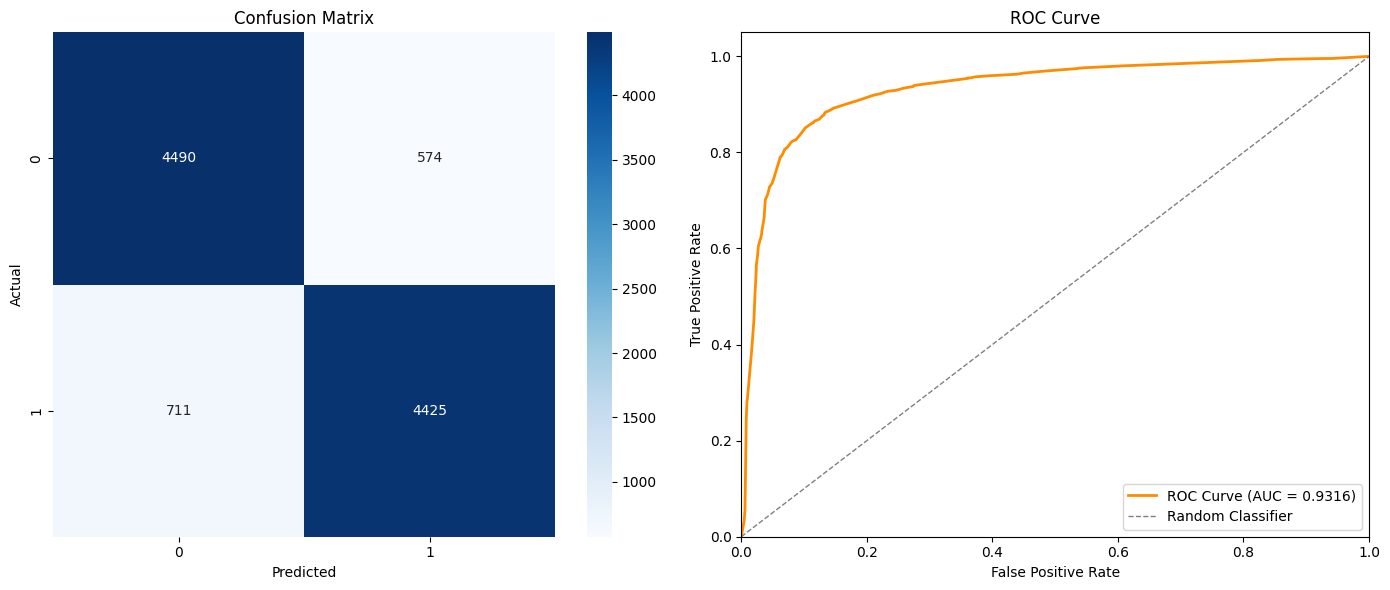

C:\Users\user\AppData\Local\Temp\ipykernel_3952\2946859387.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')


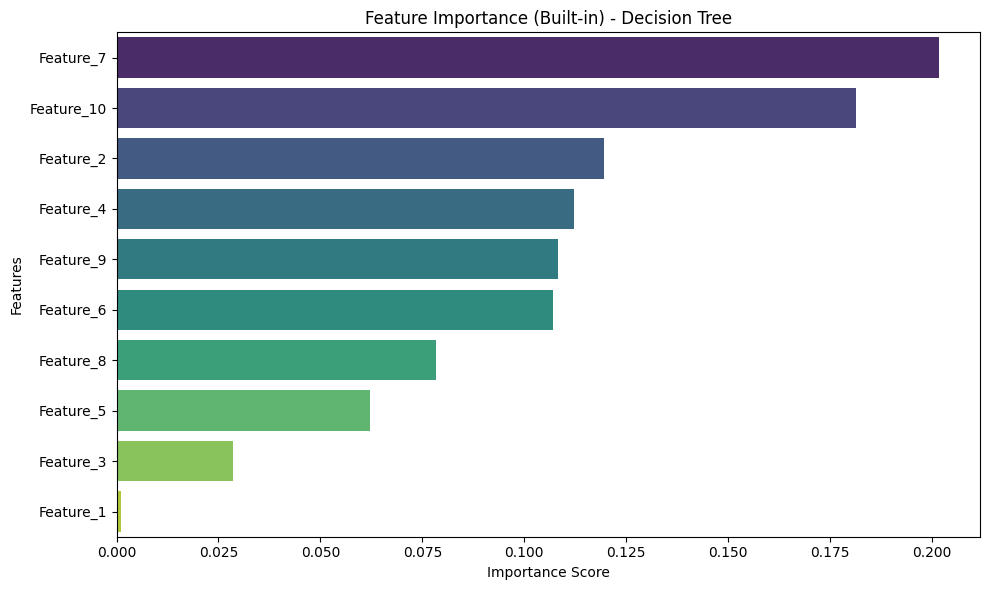


Feature Importance (Built-in):
      Feature  Importance
6   Feature_7    0.201636
9  Feature_10    0.181197
1   Feature_2    0.119466
3   Feature_4    0.112061
8   Feature_9    0.108347
5   Feature_6    0.106973
7   Feature_8    0.078238
4   Feature_5    0.062219
2   Feature_3    0.028668
0   Feature_1    0.001195


C:\Users\user\AppData\Local\Temp\ipykernel_3952\2946859387.py:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=perm_df, x='Importance', y='Feature', palette='coolwarm')


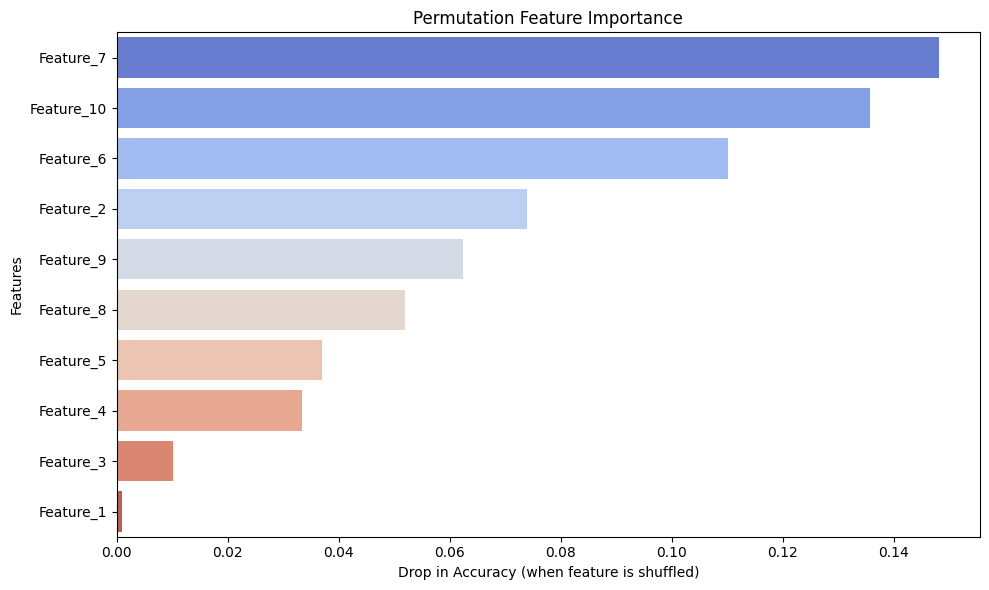


Permutation Feature Importance:
      Feature  Importance
6   Feature_7    0.148088
9  Feature_10    0.135667
5   Feature_6    0.110118
1   Feature_2    0.073961
8   Feature_9    0.062412
7   Feature_8    0.051892
4   Feature_5    0.037000
3   Feature_4    0.033392
2   Feature_3    0.010157
0   Feature_1    0.000990


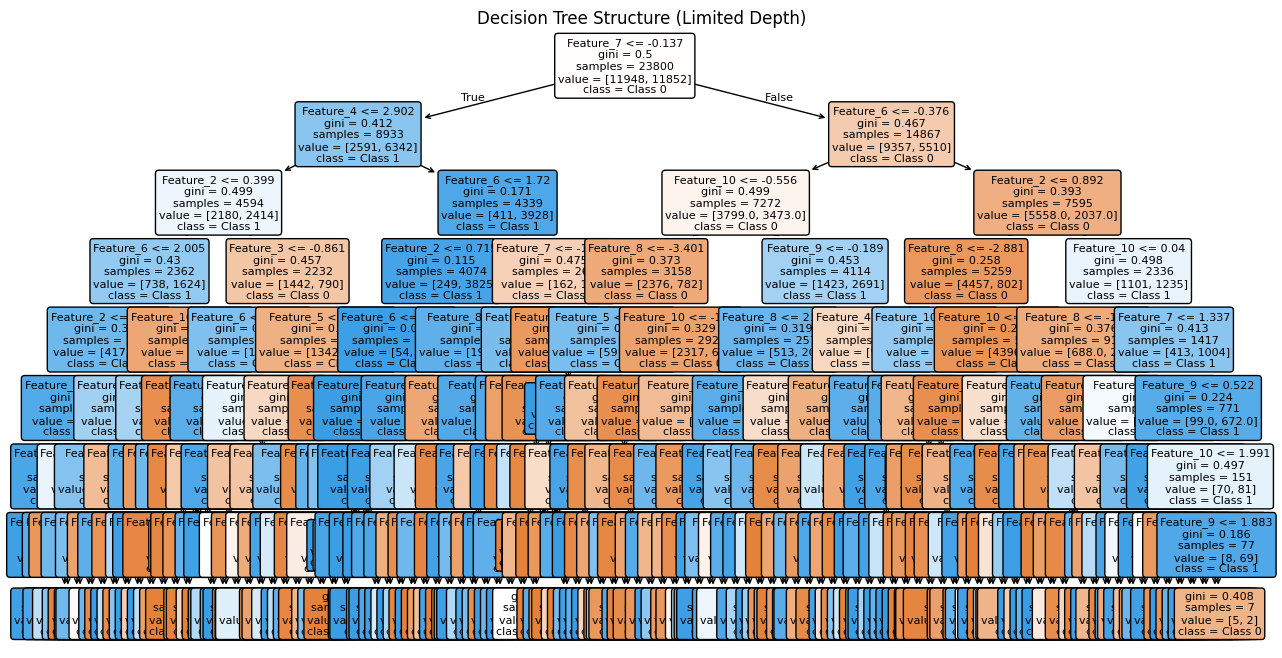

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix,
    roc_curve,
    auc,
    accuracy_score,
    classification_report
)
from sklearn.inspection import permutation_importance

# Set random seed for reproducibility
np.random.seed(42)

# =============================
# 1. Generate Dataset (34000 data, 10 features)
# =============================
X, y = make_classification(
    n_samples=34000,
    n_features=10,
    n_informative=8,
    n_redundant=2,
    n_classes=2,
    random_state=42
)

# Feature names
feature_names = [f'Feature_{i+1}' for i in range(10)]
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

print("Dataset Head:")
print(df.head())
print(f"\nDataset Shape: {df.shape}")

# =============================
# 2. Train-Test Split
# =============================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# =============================
# 3. Train Decision Tree Model
# =============================
model = DecisionTreeClassifier(
    max_depth=8,       # pre-pruning Max depth of tree (e.g., 3–6 levels)
    min_samples_split=10, # Minimum samples required to split
    min_samples_leaf=5,   # # Minimum samples in leaf node
    random_state=42,
    criterion='gini'
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class

# =============================
# 4. Model Evaluation
# =============================
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"AUC Score: {roc_auc:.4f}")

print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# =============================
# 5. Plot: Confusion Matrix & ROC Curve
# =============================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# ROC Curve
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
axes[1].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Classifier')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

# =============================
# 6. Feature Importance (Built-in)
# =============================
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Built-in) - Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("\nFeature Importance (Built-in):")
print(feature_importance_df)

# =============================
# 7. Permutation Importance (More Robust)
# =============================
perm_importance = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy'
)

perm_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=perm_df, x='Importance', y='Feature', palette='coolwarm')
plt.title('Permutation Feature Importance')
plt.xlabel('Drop in Accuracy (when feature is shuffled)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("\nPermutation Feature Importance:")
print(perm_df)

# =============================
# 8. Optional: Tree Visualization (Small depth for clarity)
# =============================
plt.figure(figsize=(15, 8))
from sklearn.tree import plot_tree
plot_tree(model, feature_names=feature_names, class_names=['Class 0', 'Class 1'],
          filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Structure (Limited Depth)")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Step 1: Grow a large tree
dt_full = DecisionTreeClassifier(random_state=42, criterion='gini')
dt_full.fit(X_train, y_train)

# Step 2: Get optimal alpha values for pruning
path = dt_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # Sorted in increasing order

# Step 3: Train trees for each alpha and pick best
from sklearn.metrics import accuracy_score

pruned_models = []
train_scores = []
val_scores = []

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    val_scores.append(clf.score(X_test, y_test))
    pruned_models.append(clf)

# Find best alpha (max validation accuracy)
best_idx = np.argmax(val_scores)
best_alpha = ccp_alphas[best_idx]
pruned_tree = pruned_models[best_idx]

print(f"Best CCP Alpha: {best_alpha:.6f}")
print(f"Best Validation Accuracy: {val_scores[best_idx]:.4f}")
print(f"Tree Depth: {pruned_tree.get_depth()}")
print(f"Number of Leaves: {pruned_tree.get_n_leaves()}")

plt.figure(figsize=(14, 8))
tree.plot_tree(pruned_tree,
               feature_names=feature_names,
               class_names=['Class 0', 'Class 1'],
               filled=True,
               rounded=True,
               fontsize=10)
plt.title(f"Pruned Decision Tree (Depth = {pruned_tree.get_depth()}, CCP α = {best_alpha:.5f})")
plt.show()

# Full tree
full_tree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
print("Full Tree Depth:", full_tree.get_depth())
print("Full Tree Leaves:", full_tree.get_n_leaves())

# Pruned tree
print("Pruned Tree Depth:", pruned_tree.get_depth())
print("Pruned Tree Leaves:", pruned_tree.get_n_leaves())

Dataset Head:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0  -0.042375  -0.613909  -1.520870   0.425742   1.448784  -1.186647   
1  -0.301464   1.561446   2.085848   0.352879  -2.784729   0.604897   
2  -1.429839  -4.574818   0.865326   3.406769   0.109679   0.110667   
3   1.153582  -0.703640   0.638677  -0.811433   0.142796   1.047376   
4   5.553882  -1.794461   4.615764  -4.834441  -0.056307  -1.252433   

   Feature_7  Feature_8  Feature_9  Feature_10  Target  
0   1.211138   1.638995   1.130259   -1.042248       0  
1  -3.027484   0.261919  -1.614547    0.486968       0  
2   0.440615   2.628613   0.896503    0.069644       1  
3   1.277690  -1.637484   0.898148    2.534501       1  
4   4.419258  -0.277311  -0.212956   -2.611014       0  

Dataset Shape: (3400, 11)

Accuracy: 0.9157
AUC Score: 0.9682

Confusion Matrix:
[[465  50]
 [ 36 469]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90

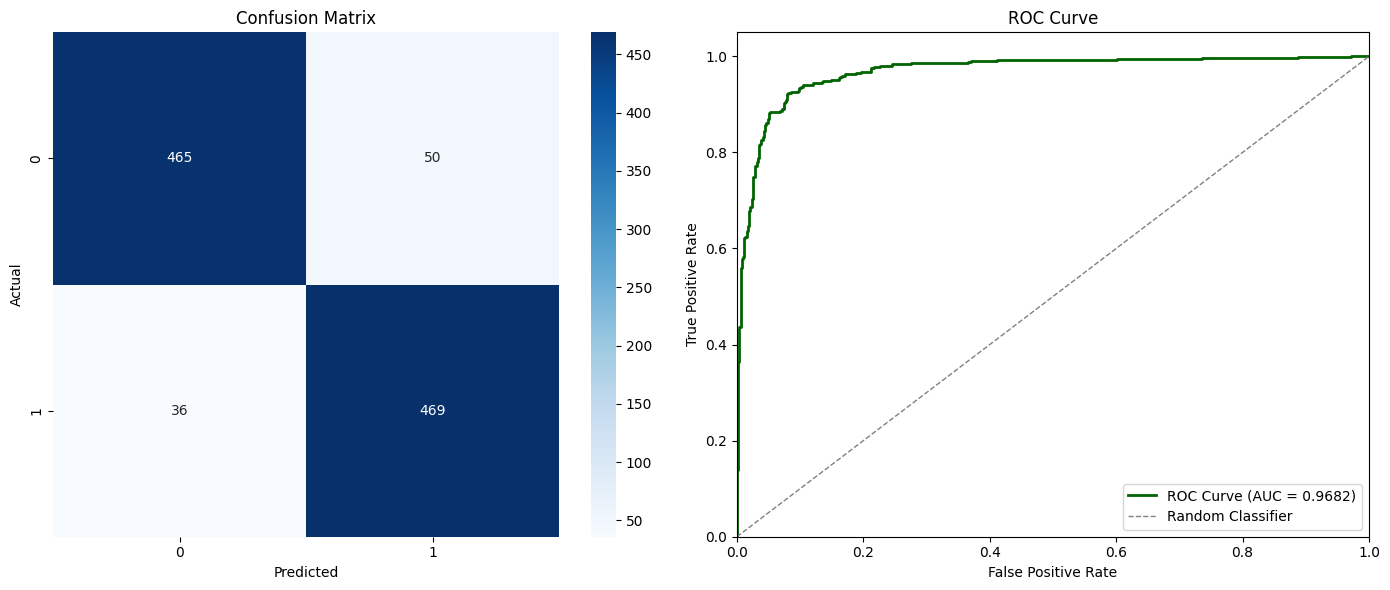

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    confusion_matrix,
    roc_curve,
    auc,
    accuracy_score,
    classification_report,
)

# Set random seed
np.random.seed(42)

# =============================
# 1. Generate Dataset (3400 rows, 10 features)
# =============================
X, y = make_classification(
    n_samples=3400,
    n_features=10,
    n_informative=8,
    n_redundant=2,
    n_classes=2,
    random_state=42
)

feature_names = [f'Feature_{i+1}' for i in range(10)]
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

print("Dataset Head:")
print(df.head())
print(f"\nDataset Shape: {df.shape}")

# =============================
# 2. Train-Test Split
# =============================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# =============================
# 3. Feature Scaling (Required for SVM)
# =============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =============================
# 4. Train SVM Model
# =============================
# Use RBF kernel for non-linear separation
model = SVC(
    kernel='rbf',           # Can also try 'linear', 'poly'
    C=1.0,                  # Regularization parameter
    gamma='scale',          # Kernel coefficient
    probability=True,       # Needed for predict_proba and ROC
    random_state=42
)
model.fit(X_train_scaled, y_train)

# =============================
# 5. Predictions
# =============================
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC

# =============================
# 6. Model Evaluation
# =============================
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"AUC Score: {roc_auc:.4f}")

print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# =============================
# 7. Plot: Confusion Matrix & ROC Curve
# =============================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# ROC Curve
axes[1].plot(fpr, tpr, color='darkgreen', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
axes[1].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Classifier')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

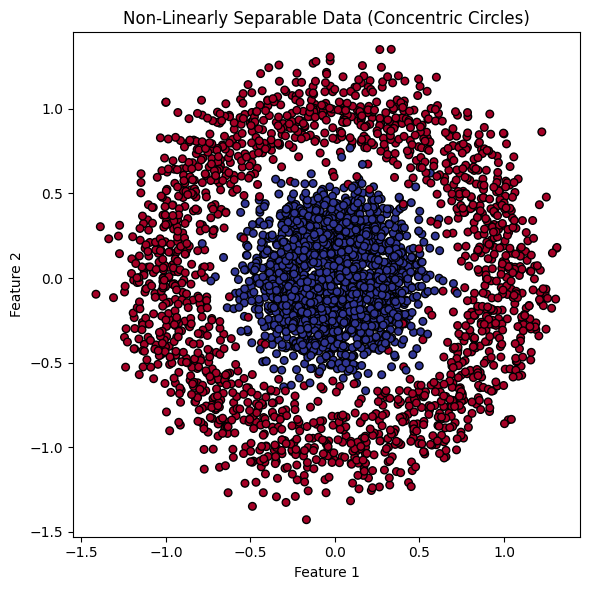

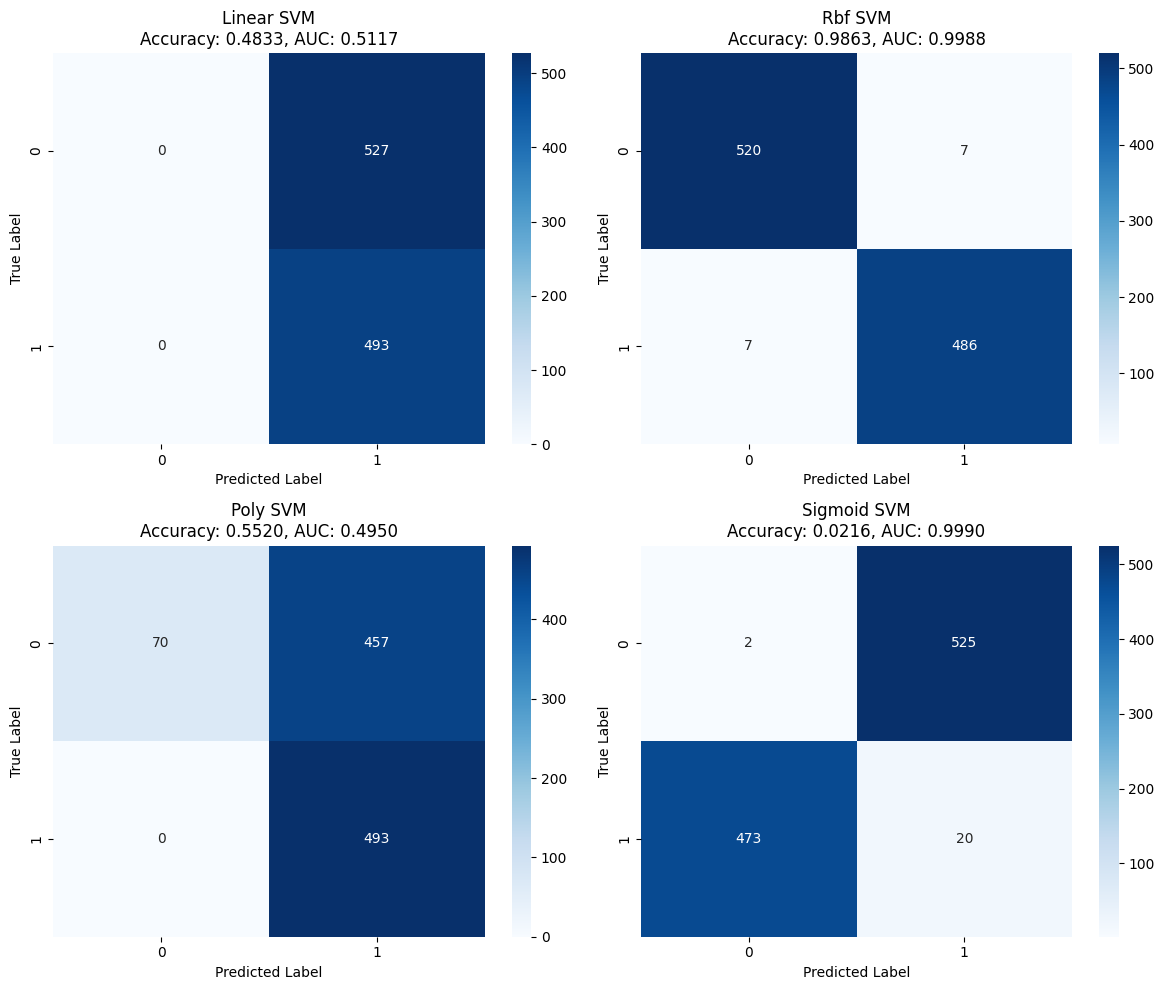

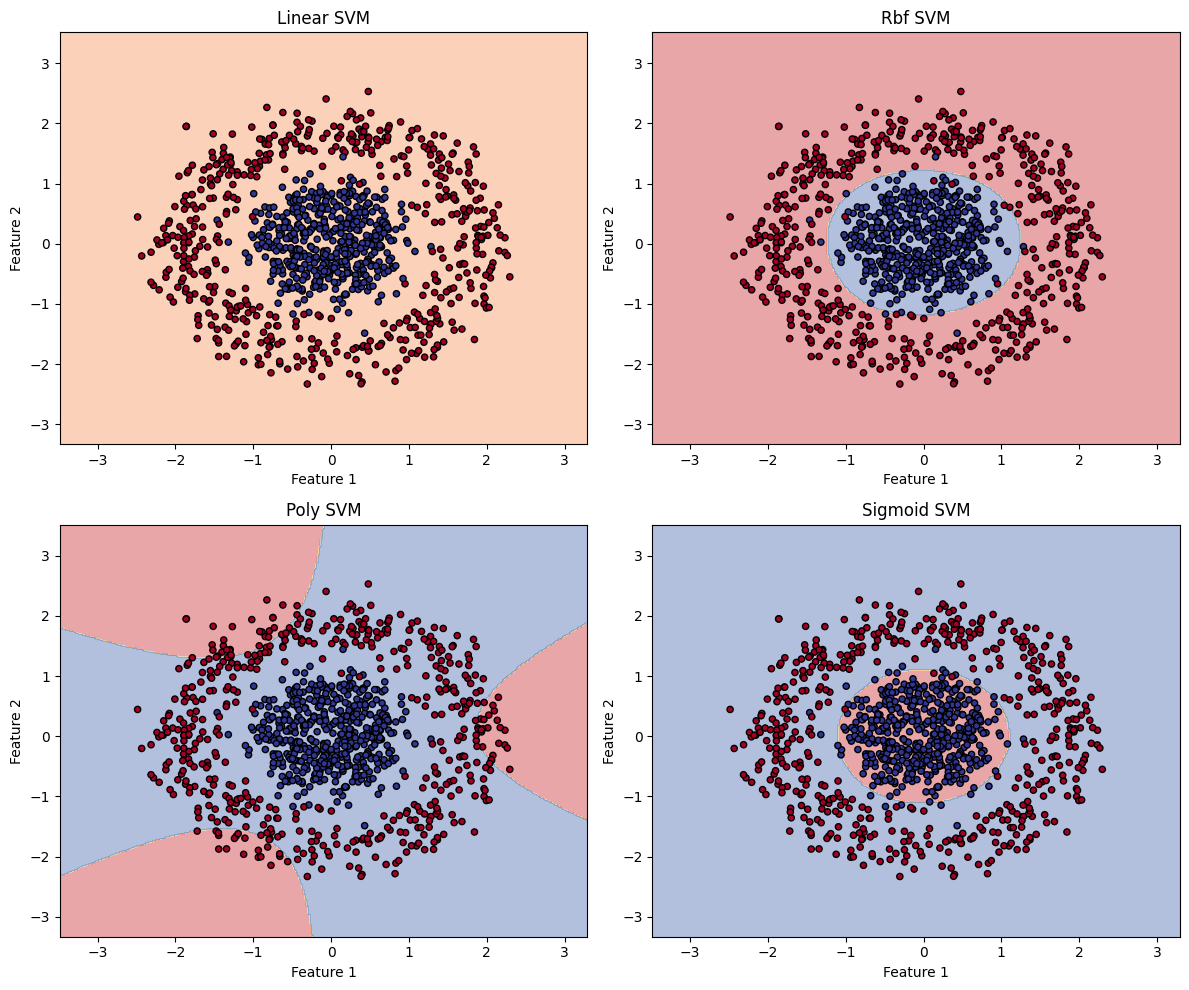

\n======================================================================
 SVM PERFORMANCE SUMMARY (KERNEL COMPARISON)
Model        Accuracy   AUC        TN FP        FN TP
----------------------------------------------------------------------
Linear       0.4833     0.5117     0 527 0 493
Rbf          0.9863     0.9988     520 7   7 486
Poly         0.5520     0.4950     70 457 0 493
Sigmoid      0.0216     0.9990     2 525 473 20


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Set random seed for reproducibility
np.random.seed(42)

# ===================================================
# 1. Generate Non-Linearly Separable Dataset (3400 rows, 2 features)
# ===================================================
X, y = make_circles(n_samples=3400, noise=0.15, factor=0.3, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (required for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===================================================
# 2. Plot Original Data
# ===================================================
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='k', s=30)
plt.title("Non-Linearly Separable Data (Concentric Circles)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis('equal')
plt.tight_layout()
plt.show()

# ===================================================
# 3. Train SVM Models: Linear + Kernels
# ===================================================
# Linear SVM
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)
acc_linear = accuracy_score(y_test, y_pred_linear)
auc_linear = roc_auc_score(y_test, svm_linear.decision_function(X_test_scaled))
cm_linear = confusion_matrix(y_test, y_pred_linear)

# Kernel SVMs
kernels = {
    'rbf': SVC(kernel='rbf', gamma='scale', C=1.0, probability=True, random_state=42),
    'poly': SVC(kernel='poly', degree=3, C=1.0, probability=True, random_state=42),
    'sigmoid': SVC(kernel='sigmoid', coef0=2, C=1.0, probability=True, random_state=42)
}

results = {
    'Linear': {
        'model': svm_linear,
        'acc': acc_linear,
        'auc': auc_linear,
        'cm': cm_linear,
        'y_pred': y_pred_linear
    }
}

for name, model in kernels.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
    cm = confusion_matrix(y_test, y_pred)
    
    results[name.title()] = {
        'model': model,
        'acc': acc,
        'auc': auc_score,
        'cm': cm,
        'y_pred': y_pred
    }

# ===================================================
# 4. Plot Confusion Matrices
# ===================================================
fig_cm, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, (name, res) in zip(axes.flat, results.items()):
    sns.heatmap(res['cm'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"{name} SVM\nAccuracy: {res['acc']:.4f}, AUC: {res['auc']:.4f}")
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

# ===================================================
# 5. Plot Decision Boundaries
# ===================================================
def plot_decision_boundary(ax, model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='k', s=20)
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

fig_db, axes_db = plt.subplots(2, 2, figsize=(12, 10))
axes_db = axes_db.flatten()

for idx, (name, res) in enumerate(results.items()):
    plot_decision_boundary(axes_db[idx], res['model'], X_test_scaled, y_test, f"{name} SVM")

plt.tight_layout()
plt.show()

# ===================================================
# 6. Final Performance Summary Table
# ===================================================
print("\\n" + "="*70)
print(" SVM PERFORMANCE SUMMARY (KERNEL COMPARISON)")
print("="*70)
print(f"{'Model':<12} {'Accuracy':<10} {'AUC':<10} {'TN FP':<12} {'FN TP'}")
print("-"*70)

for name, res in results.items():
    tn, fp, fn, tp = res['cm'].ravel()
    print(f"{name:<12} {res['acc']:<10.4f} {res['auc']:<10.4f} {tn} {fp:<3} {fn} {tp}")

print("="*70)